<a href="https://colab.research.google.com/github/sangfeel/RUL-data-/blob/main/RUL_%EC%98%88%EC%B8%A1_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import cm

import tensorflow as tf

import sklearn

import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_file = "/content/drive/MyDrive/AIX딥러닝_기말과제:모터잔여수명예측/CMAPSSData/CMAPSSData/train_FD004.txt"
test_file = "/content/drive/MyDrive/AIX딥러닝_기말과제:모터잔여수명예측/CMAPSSData/CMAPSSData/test_FD004.txt"
RUL_file = "/content/drive/MyDrive/AIX딥러닝_기말과제:모터잔여수명예측/CMAPSSData/CMAPSSData/RUL_FD004.txt"

df = pd.read_csv(train_file,sep=' ',header=None)
df.head(322)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,NaN,NaN
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,NaN,NaN
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,NaN,NaN
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,NaN,NaN
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,1,318,10.0046,0.2500,100.0,489.05,605.56,1509.31,1324.42,10.52,...,8179.79,8.4656,0.03,374,2319,100.00,28.77,17.4422,NaN,NaN
318,1,319,10.0009,0.2520,100.0,489.05,605.29,1512.36,1317.11,10.52,...,8177.70,8.4545,0.03,373,2319,100.00,28.87,17.4126,NaN,NaN
319,1,320,20.0060,0.7002,100.0,491.19,607.24,1496.88,1266.21,9.35,...,8108.60,9.0019,0.03,368,2324,100.00,24.90,15.0215,NaN,NaN
320,1,321,42.0058,0.8400,100.0,445.00,549.71,1368.61,1147.00,3.91,...,8138.46,9.1322,0.02,335,2212,100.00,10.81,6.4590,NaN,NaN


In [ ]:
df.drop(columns=[26,27], inplace=True)
df.columns = ['Section{}'.format(i) for i in range (26)]
df.head()

,Section0,Section1,Section2,Section3,Section4,Section5,Section6,Section7,Section8,Section9,...,Section16,Section17,Section18,Section19,Section20,Section21,Section22,Section23,Section24,Section25
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


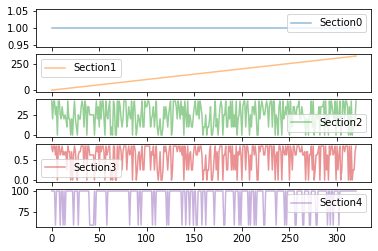

In [ ]:
plot_cols = df.columns[0:5] #기계번호 
plot_features = df[plot_cols][:321]
_ = plot_features.plot(subplots=True, alpha=0.5)

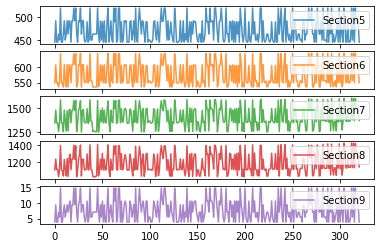

In [ ]:
plot_cols = df.columns[5:10]
plot_features = df[plot_cols][:321]
_ = plot_features.plot(subplots=True, alpha=0.8)

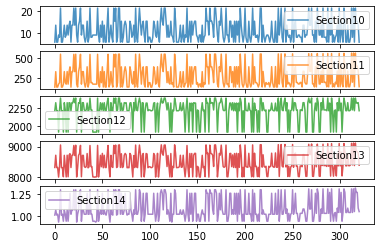

In [ ]:
plot_cols = df.columns[10:15]
plot_features = df[plot_cols][:321]
_ = plot_features.plot(subplots=True, alpha=0.8)

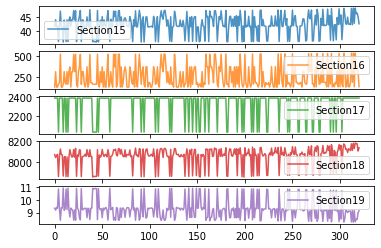

In [ ]:
plot_cols = df.columns[15:20]
plot_features = df[plot_cols][:321]
_ = plot_features.plot(subplots=True, alpha=0.8)

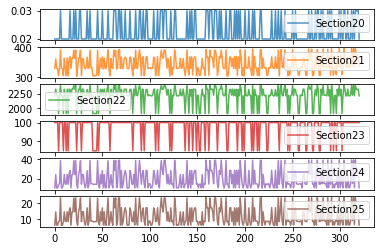

In [ ]:
plot_cols = df.columns[20:26]
plot_features = df[plot_cols][:321]
_ = plot_features.plot(subplots=True, alpha=0.8)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Section0,61249.0,124.325181,71.995350,1.0000,60.0000,126.0000,185.0000,249.0000
Section1,61249.0,134.311417,89.783389,1.0000,62.0000,123.0000,191.0000,543.0000
Section2,61249.0,23.999823,14.780722,0.0000,10.0046,25.0014,41.9981,42.0080
Section3,61249.0,0.571347,0.310703,0.0000,0.2507,0.7000,0.8400,0.8420
Section4,61249.0,94.031576,14.251954,60.0000,100.0000,100.0000,100.0000,100.0000
Section5,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
Section6,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
Section7,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
Section8,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
Section9,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200


In [ ]:
rul_series=df.groupby('Section0')['Section1'].max()
rul_series[:]
#측정되기 시작한 수명(잔여수명)
rul_series

Section0
1      321
2      299
3      307
4      274
5      193
      ... 
245    205
246    161
247    211
248    184
249    255
Name: Section1, Length: 249, dtype: int64

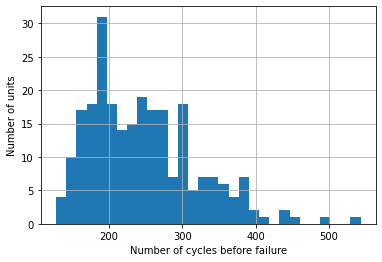

In [ ]:
fig, ax = plt.subplots()
df.groupby('Section0')['Section1'].max().hist(ax=ax, bins=30);
ax.set_xlabel("Number of cycles before failure");
ax.set_ylabel("Number of units");

In [ ]:
train_df = (df - df.mean())/df.std()
train_df.head()

,Section0,Section1,Section2,Section3,Section4,Section5,Section6,Section7,Section8,Section9,...,Section16,Section17,Section18,Section19,Section20,Section21,Section22,Section23,Section24,Section25
0,-1.71296,-1.484812,1.218146,0.864661,0.418779,-1.054681,-0.796410,-0.701406,-0.745723,-1.137668,...,-0.988999,0.417810,0.081921,0.063830,-0.694272,-0.638660,-0.114202,0.418779,-1.030991,-1.031747
1,-1.71296,-1.473674,-0.270476,0.414714,0.418779,0.692502,0.713660,0.562445,0.298210,0.363903,...,0.331128,0.415782,-0.253084,-0.125676,-0.694272,0.476116,0.655703,0.418779,0.352811,0.358261
2,-1.71296,-1.462536,1.218072,0.867558,0.418779,-1.054681,-0.815959,-0.704326,-0.711196,-1.137668,...,-0.990154,0.417654,-0.013912,0.153385,-0.694272,-0.674620,-0.114202,0.418779,-1.045080,-1.022640
3,-1.71296,-1.451398,1.217814,0.864661,0.418779,-1.054681,-0.822653,-0.722034,-0.702984,-1.137668,...,-0.988854,0.418045,0.096161,0.068361,-0.694272,-0.710581,-0.114202,0.418779,-1.039042,-1.023261
4,-1.71296,-1.440260,0.068094,0.158843,-2.387853,-0.391213,-1.160069,-1.532168,-1.410616,-0.270952,...,-0.741091,-2.389647,-2.358008,2.066965,-0.694272,-1.537672,-2.155825,-2.387853,-0.687808,-0.644607


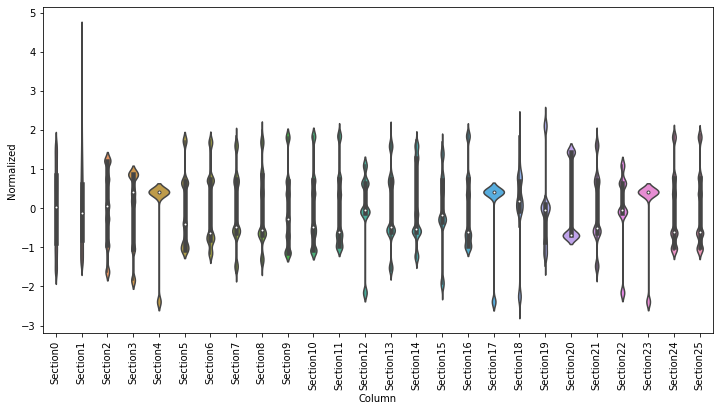

In [ ]:
df_std = train_df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)


In [ ]:
df_test = pd.read_csv(test_file, sep=" ",header=None)
df_test.drop(columns=[26,27],inplace=True)
df_test.columns = ['Section{}'.format(i) for i in range (26)]
df_test

,Section0,Section1,Section2,Section3,Section4,Section5,Section6,Section7,Section8,Section9,...,Section16,Section17,Section18,Section19,Section20,Section21,Section22,Section23,Section24,Section25
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41209,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,130.87,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620
41210,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,314.51,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486
41211,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,182.76,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389
41212,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,314.17,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887


In [ ]:
df_rul = pd.read_csv(RUL_file, names=['rul'])
df_rul

,rul
0,22
1,39
2,107
3,75
4,149
...,...
243,35
244,131
245,194
246,112


In [ ]:
model = tf.keras.models.Sequential()

norm = tf.keras.layers.experimental.preprocessing.Normalization()
norm.adapt(train_df)
model.add(norm)

model.add(tf.keras.layers.LSTM(32, dropout=0.2))

model.add(tf.keras.layers.Dense(1))

model.add(tf.keras.layers.Lambda(lambda x: x * 206))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), loss="mse", metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(train_ds.batch(10).shuffle(10), epochs=200, verbose=1)

ValueError: ignored

In [ ]:
data.shape